In [2]:
import numpy as np 
import pandas as pd 
import scipy.stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from scipy.stats import randint


In [3]:
# Read in Heroin Use data
H = pd.read_csv("Heroin Use In the Past Year_By State.csv")

In [4]:
# This data contains 51 unique states
H.describe(include = 'object')

,state
count,255
unique,51
top,Nevada
freq,5


In [5]:
H.describe()

,year_pair,estimate,ci_lower,ci_upper
count,255.000000,255.000000,255.000000,255.000000
mean,2016.000000,0.003645,0.001974,0.006800
std,1.416995,0.001735,0.001069,0.002906
min,2014.000000,0.001143,0.000517,0.002232
25%,2015.000000,0.002442,0.001219,0.004870
50%,2016.000000,0.003260,0.001705,0.006076
75%,2017.000000,0.004394,0.002478,0.008034
max,2018.000000,0.012311,0.007026,0.022272


In [6]:
# Group data by year
H_2014 = H[H.year_pair == 2014]
H_2015 = H[H.year_pair == 2015]
H_2016 = H[H.year_pair == 2016]
H_2017 = H[H.year_pair == 2017]
H_2018 = H[H.year_pair == 2018]

In [7]:
# Find out the top 10 states have the most Heroin Use
# Delaware and Alaska are the only states that within the top 10 heroin use tables across 4 years. 
# 2014
HTOP14 = H_2014.nlargest(10,['estimate'])
HTOP14.head(10)

,year_pair,state,estimate,ci_lower,ci_upper
7,2014,Delaware,0.011250,0.007026,0.017967
1,2014,Alaska,0.007018,0.003572,0.013741
6,2014,Connecticut,0.005574,0.002967,0.010450
29,2014,New Hampshire,0.005230,0.003194,0.008555
8,2014,District of Columbia,0.005108,0.002468,0.010544
17,2014,Kentucky,0.005031,0.002869,0.008807
38,2014,Pennsylvania,0.004892,0.003487,0.006861
19,2014,Maine,0.004874,0.002723,0.008708
45,2014,Vermont,0.004734,0.002551,0.008768
30,2014,New Jersey,0.004504,0.002522,0.008029


In [8]:
# 2015
HTOP15 = H_2015.nlargest(10,['estimate'])
HTOP15.head(10)

,year_pair,state,estimate,ci_lower,ci_upper
52,2015,Alaska,0.012311,0.006774,0.022272
58,2015,Delaware,0.010453,0.006270,0.017378
71,2015,Maryland,0.008795,0.004716,0.016344
57,2015,Connecticut,0.008706,0.004504,0.016762
96,2015,Vermont,0.007750,0.004028,0.014860
81,2015,New Jersey,0.006807,0.003999,0.011565
80,2015,New Hampshire,0.006207,0.003505,0.010972
59,2015,District of Columbia,0.006139,0.003036,0.012374
70,2015,Maine,0.005831,0.002779,0.012196
53,2015,Arizona,0.005516,0.002850,0.010653


In [9]:
# 2016
HTOP16 = H_2016.nlargest(10,['estimate'])
HTOP16.head(10)

,year_pair,state,estimate,ci_lower,ci_upper
131,2016,New Hampshire,0.008701,0.005400,0.013990
103,2016,Alaska,0.007451,0.004201,0.013183
109,2016,Delaware,0.007256,0.004181,0.012562
108,2016,Connecticut,0.007084,0.004060,0.012331
150,2016,West Virginia,0.005676,0.003272,0.009831
147,2016,Vermont,0.005560,0.003096,0.009967
122,2016,Maryland,0.005363,0.003036,0.009459
132,2016,New Jersey,0.005087,0.002977,0.008680
121,2016,Maine,0.004776,0.002678,0.008501
119,2016,Kentucky,0.004684,0.002588,0.008463


In [10]:
# 2017
HTOP17 = H_2017.nlargest(10,['estimate'])
HTOP17.head(10)

,year_pair,state,estimate,ci_lower,ci_upper
160,2017,Delaware,0.008434,0.004975,0.014263
159,2017,Connecticut,0.007034,0.004176,0.011824
201,2017,West Virginia,0.006885,0.004212,0.011234
182,2017,New Hampshire,0.006762,0.004091,0.011157
167,2017,Indiana,0.006370,0.003831,0.010575
191,2017,Pennsylvania,0.005822,0.003989,0.008492
173,2017,Maryland,0.005359,0.003142,0.009128
172,2017,Maine,0.005069,0.002998,0.008561
181,2017,Nevada,0.004950,0.002729,0.008964
198,2017,Vermont,0.004797,0.002682,0.008567


In [11]:
# 2018
HTOP18 = H_2018.nlargest(10,['estimate'])
HTOP18.head(10)

,year_pair,state,estimate,ci_lower,ci_upper
211,2018,Delaware,0.008382,0.004676,0.014980
223,2018,Maine,0.006528,0.003526,0.012057
249,2018,Vermont,0.006516,0.003550,0.011928
234,2018,New Jersey,0.006069,0.003359,0.010942
242,2018,Pennsylvania,0.005900,0.003932,0.008843
225,2018,Massachusetts,0.005232,0.002767,0.009870
205,2018,Alaska,0.005224,0.002701,0.010081
252,2018,West Virginia,0.005039,0.002766,0.009161
218,2018,Indiana,0.004921,0.002756,0.008772
239,2018,Ohio,0.004900,0.003180,0.007541


In [16]:
# Draw a trend of Delaware and Alaska across years.
DA = H.query('state in ["Delaware", "Alaska"]')

,year_pair,state,estimate,ci_lower,ci_upper
1,2014,Alaska,0.007018,0.003572,0.013741
7,2014,Delaware,0.011250,0.007026,0.017967
52,2015,Alaska,0.012311,0.006774,0.022272
58,2015,Delaware,0.010453,0.006270,0.017378
103,2016,Alaska,0.007451,0.004201,0.013183
109,2016,Delaware,0.007256,0.004181,0.012562
154,2017,Alaska,0.004446,0.002381,0.008284
160,2017,Delaware,0.008434,0.004975,0.014263
205,2018,Alaska,0.005224,0.002701,0.010081
211,2018,Delaware,0.008382,0.004676,0.014980


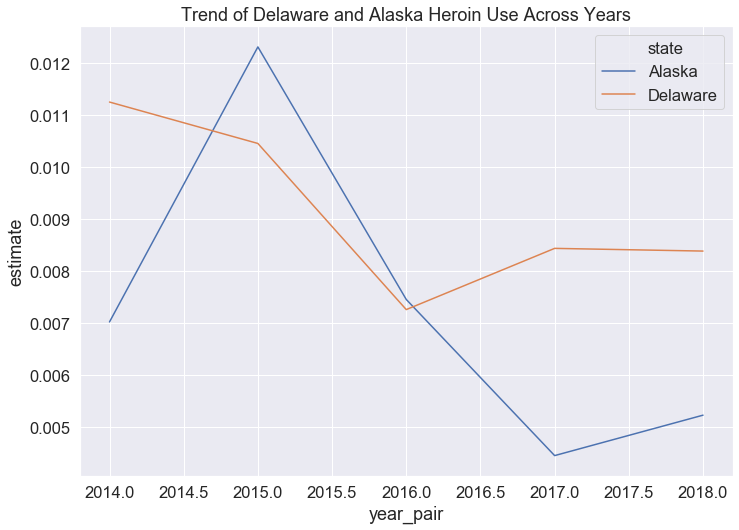

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set(font_scale=1.5)
sns.lineplot(x = 'year_pair',y = 'estimate',
            hue='state',
            data=DA). set_title("Trend of Delaware and Alaska Heroin Use Across Years")
plt.show()